In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [39]:
# Read data from file
df= pd.read_csv('epa-sea-level.csv')
df.set_index('Year', inplace=True)
df

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2009,8.586614,8.311024,8.862205,8.046354
2010,8.901575,8.618110,9.185039,8.122973
2011,8.964567,8.661417,9.267717,8.053065


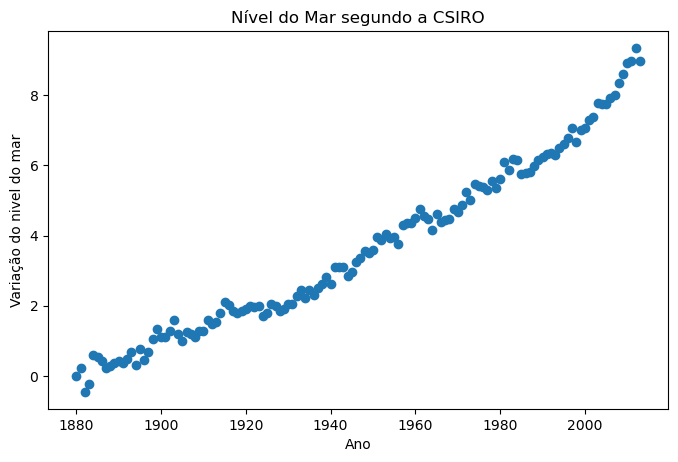

In [40]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax.set_title("Nível do Mar segundo a CSIRO")
ax.set_xlabel("Ano")
ax.set_ylabel("Variação do nivel do mar")
plt.scatter(df.index, df['CSIRO Adjusted Sea Level'])
plt.show()

In [41]:
#prepare data
x= df.index
y = df['CSIRO Adjusted Sea Level']
m = linregress(x, y)
print(f"R-squared: {m.rvalue**2:.6f}")
fut = np.arange(1880, 2050, 20)

R-squared: 0.969747


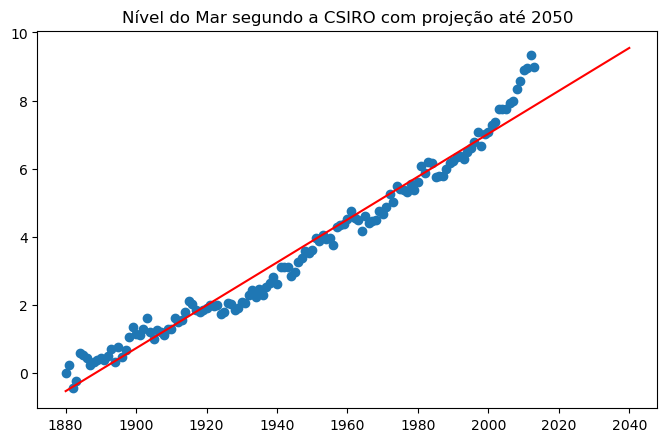

In [42]:
# Create first line of best fit
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
plt.plot(fut, m.intercept + m.slope*fut, 'r', label='fitted line')
ax.set_title("Nível do Mar segundo a CSIRO com projeção até 2050")
plt.scatter(df.index, df['CSIRO Adjusted Sea Level'])
plt.show()

In [51]:
# prepare data for the second line of best fit
df_filt = df[df.index >= 2000]
x_new= df_filt.index
y_new = df_filt['CSIRO Adjusted Sea Level']
n = linregress(x_new, y_new)
print(f"R-squared: {n.rvalue**2:.6f}")
fut_new = np.arange(2000, 2050, 20)

R-squared: 0.953137


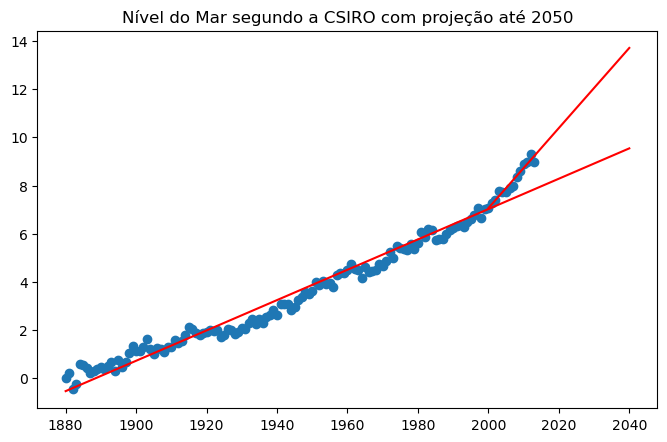

In [44]:
# Create second line of best fit
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
plt.plot(fut, m.intercept + m.slope*fut, 'r', label='fitted line')
plt.plot(fut_new, n.intercept + n.slope*fut_new, 'r', label='fitted line')
ax.set_title("Nível do Mar segundo a CSIRO com projeção até 2050")
plt.scatter(df.index, df['CSIRO Adjusted Sea Level'])
plt.show()

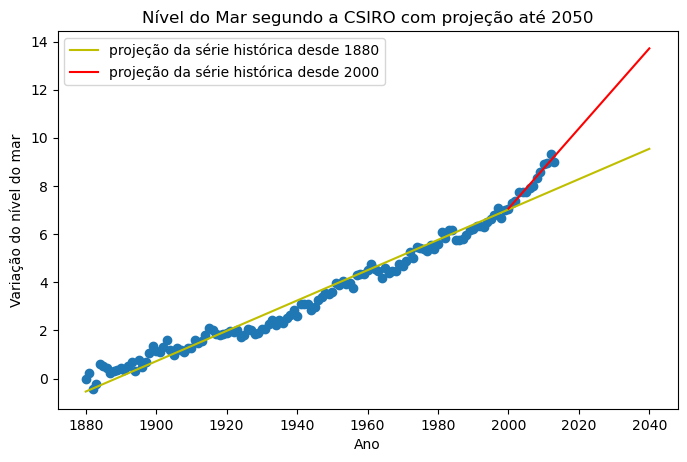

In [49]:
# Add labels and title
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
plt.plot(fut, m.intercept + m.slope*fut, 'y', label='projeção da série histórica desde 1880')
plt.plot(fut_new, n.intercept + n.slope*fut_new, 'r', label='projeção da série histórica desde 2000')
ax.set_title("Nível do Mar segundo a CSIRO com projeção até 2050")
ax.set_xlabel("Ano")
ax.set_ylabel("Variação do nível do mar")
plt.scatter(df.index, df['CSIRO Adjusted Sea Level'])
plt.legend()
plt.show()

In [50]:
# Save plot and return data for testing (DO NOT MODIFY)
fig.savefig('sea_level_plot.png', dpi=100)